In [1]:
import pandas as pd
import seaborn as sb
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [6]:
df= pd.read_csv('titanic_1_.csv')
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [7]:
encoder= LabelEncoder()
df['Sex']= encoder.fit_transform(df['Sex'])
df.drop(['Name','Siblings/Spouses Aboard','Fare'], inplace= True, axis=1)
print(df)

     Survived  Pclass  Sex   Age  Parents/Children Aboard
0           0       3    1  22.0                        0
1           1       1    0  38.0                        0
2           1       3    0  26.0                        0
3           1       1    0  35.0                        0
4           0       3    1  35.0                        0
..        ...     ...  ...   ...                      ...
882         0       2    1  27.0                        0
883         1       1    0  19.0                        0
884         0       3    0   7.0                        2
885         1       1    1  26.0                        0
886         0       3    1  32.0                        0

[887 rows x 5 columns]


In [8]:
X=df.drop(['Pclass'], axis=1)
Y=df['Pclass']

x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.3)
gf=GaussianNB()
gf.fit(x_train, y_train)

GaussianNB()

In [10]:
pred=gf.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.44      0.47      0.46        66
           2       0.19      0.13      0.16        45
           3       0.65      0.69      0.67       156

    accuracy                           0.54       267
   macro avg       0.43      0.43      0.43       267
weighted avg       0.52      0.54      0.53       267



In [11]:
cm = confusion_matrix(y_test , pred)

<AxesSubplot:>

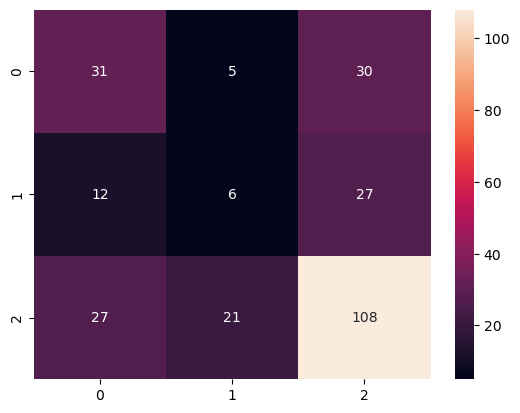

In [12]:
array = pd.DataFrame(cm , range(3) , range(3))
sb.heatmap(cm, annot=True, fmt='d')